In [1]:
import numpy as np
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config)) 

Using TensorFlow backend.


In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0, 100, (5, 5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0, 100, (5, 1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [6]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [7]:
add_op = a + b
mult_op = a * b

In [8]:
with tf.Session() as sess:
    add_result = sess.run(add_op, feed_dict={a:rand_a, b:rand_b})
    print(add_result)
    
    mult_result = sess.run(mult_op, feed_dict={a:rand_a, b:rand_b})
    print(mult_result)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


# Example Neural Network

In [9]:
n_features = 10
n_dense_neurons = 3

In [10]:
x = tf.placeholder(tf.float32, (None, n_features))

In [11]:
b = tf.Variable(tf.zeros([n_dense_neurons]))
w = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
xw = tf.matmul(x, w)

In [13]:
z = tf.add(xw, b)

In [14]:
a = tf.sigmoid(z)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a, feed_dict={x: np.random.random([2, n_features])})

In [17]:
layer_out

array([[0.53415525, 0.44564098, 0.5842615 ],
       [0.35126287, 0.16126756, 0.7744476 ]], dtype=float32)

# Full Network Example

In [18]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
x_data

array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [19]:
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)

In [20]:
y_label

array([-0.17289561,  2.24387308,  3.57001461,  3.26783558,  4.32780247,
        5.96742265,  6.14049066,  6.63051206,  7.54219188, 10.41297596])

In [21]:
import matplotlib.pyplot as plt

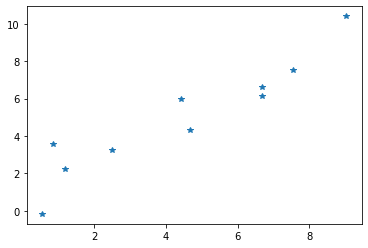

In [22]:
plt.plot(x_data,y_label,'*')

In [29]:
m = tf.Variable(0.39)
b = tf.Variable(0.2)

In [30]:
error = 0
for x, y in zip(x_data, y_label):
    y_hat = m*x + b
    error += (y_hat - y) ** 2

In [31]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    sess.run(init)
    epochs = 100
    for i in range(epochs):
        sess.run(train)
    
    final_slop, final_intercept = sess.run([m, b])

In [34]:
final_slop

0.9751744

In [35]:
final_intercept

0.58732826

In [36]:
x_test = np.linspace(-1, 11, 10)
y_pred_plot = final_slop * x_test + final_intercept

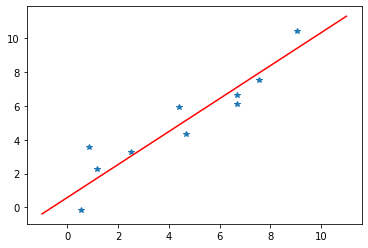

In [37]:
plt.plot(x_data,y_label,'*')
plt.plot(x_test,y_pred_plot,'r')